In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [3]:
# n = 50
# np.random.seed(1)
# y = np.array([1]*n + [2]*n + [3]*n + [1]*n) 
# N = len(y)
# X1 = np.linspace(1, N, N)
# f = interp1d(X1, y, kind='quadratic')
# X = np.linspace(1, N, 1*N)
# y = f(X)
# y = y + 0.25*np.random.rand(len(y))
# X = X.reshape(-1,1)

In [4]:
np.random.rand()

0.13289617961123035

In [5]:
np.random.seed(42)
y_clean = np.load('y_data.npy')
X_orig = np.linspace(1, len(y_clean), len(y_clean)).reshape(-1,1)/len(y_clean)
y_clean_downsampled = y_clean[::4]
y = y_clean_downsampled + 0.5*(np.random.rand(len(y_clean_downsampled)) - 0.5)
X = np.linspace(1, len(y), len(y)).reshape(-1,1)/len(y)

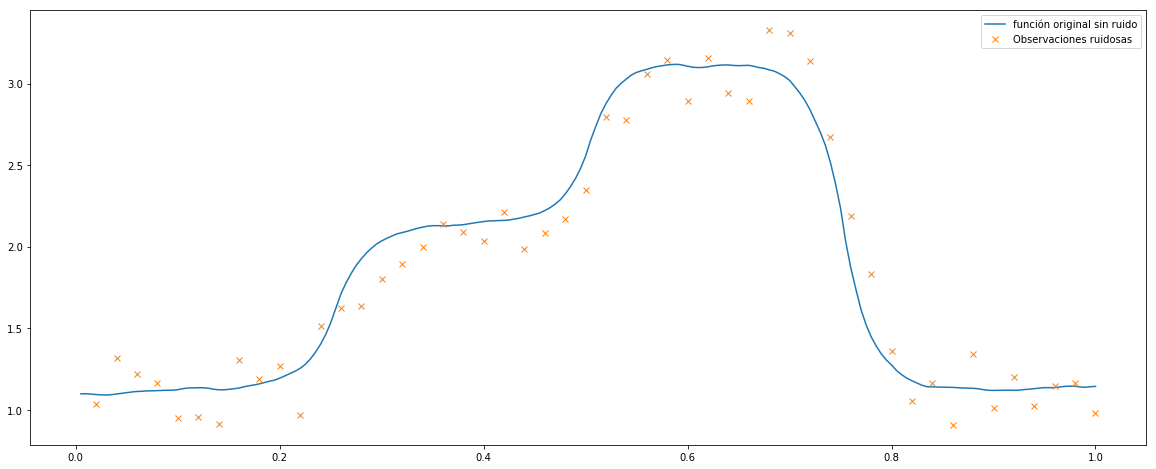

In [6]:
plt.figure(figsize=(20, 8))
plt.plot(X_orig, y_clean, label='función original sin ruido')
plt.plot(X, y, marker='x', linestyle = 'None', label='Observaciones ruidosas')
plt.legend()

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Decision Tree sin restricciones

In [8]:
dt_reg = DecisionTreeRegressor(random_state=1)

In [9]:
dt_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [10]:
y_pred = dt_reg.predict(X_orig)

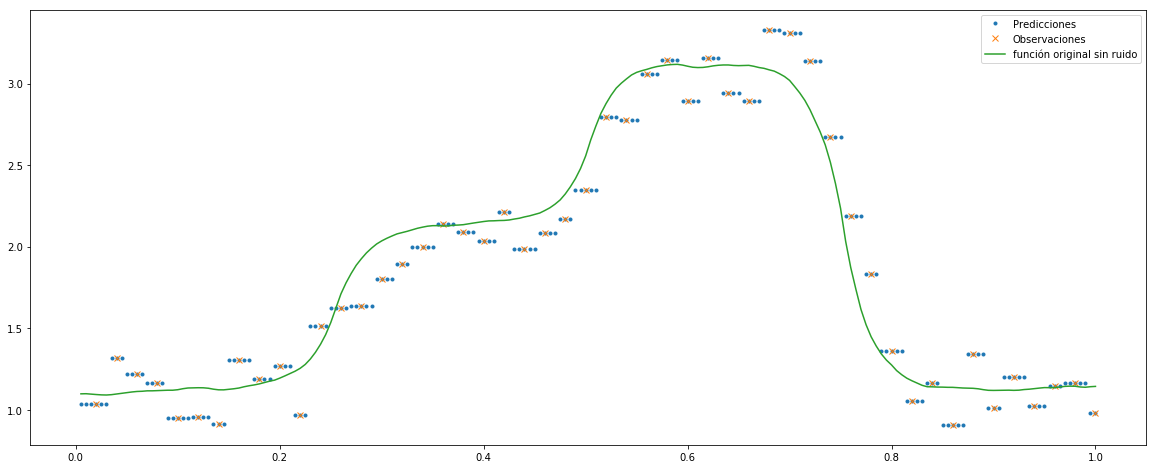

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(X_orig, y_pred, label='Predicciones', marker='.', linestyle = 'None')
plt.plot(X, y, label='Observaciones', marker='x', linestyle = 'None',)
plt.plot(X_orig, y_clean, label='función original sin ruido')
plt.legend()

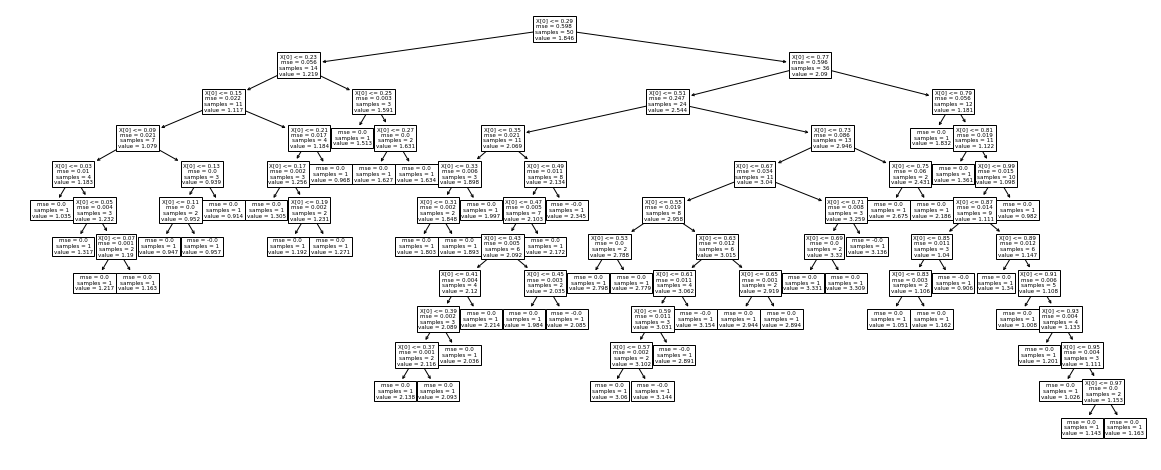

In [12]:
plt.figure(figsize=(20,8))
_= plot_tree(dt_reg)

In [13]:
dt_reg.get_n_leaves()

50

# Stump

In [14]:
stump_reg = DecisionTreeRegressor(random_state=1, max_depth=1)

In [15]:
stump_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [16]:
y_pred_stump = stump_reg.predict(X)

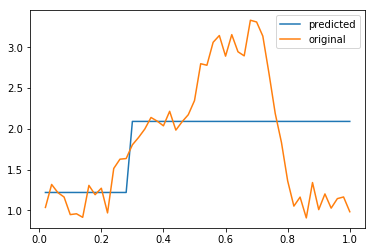

In [17]:
plt.plot(X, y_pred_stump, label='predicted')
plt.plot(X, y, label='original')
plt.legend()

# Bagging

In [18]:
from sklearn.ensemble import BaggingRegressor

In [19]:
bagg_reg = BaggingRegressor(DecisionTreeRegressor(random_state=1, criterion='mse'), n_estimators=20000, 
                             max_samples=0.5, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, random_state=1)

bagg_reg.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0

In [20]:
y_pred_bagg = bagg_reg.predict(X_orig)

In [21]:
# MSE Bagging
MSE_bagging = ((y_pred_bagg - y_clean)**2).sum()/len(y_pred_bagg)

In [22]:
# MSE Decision Tree
MSE_DT = ((y_pred - y_clean)**2).sum()/len(y_pred_bagg)

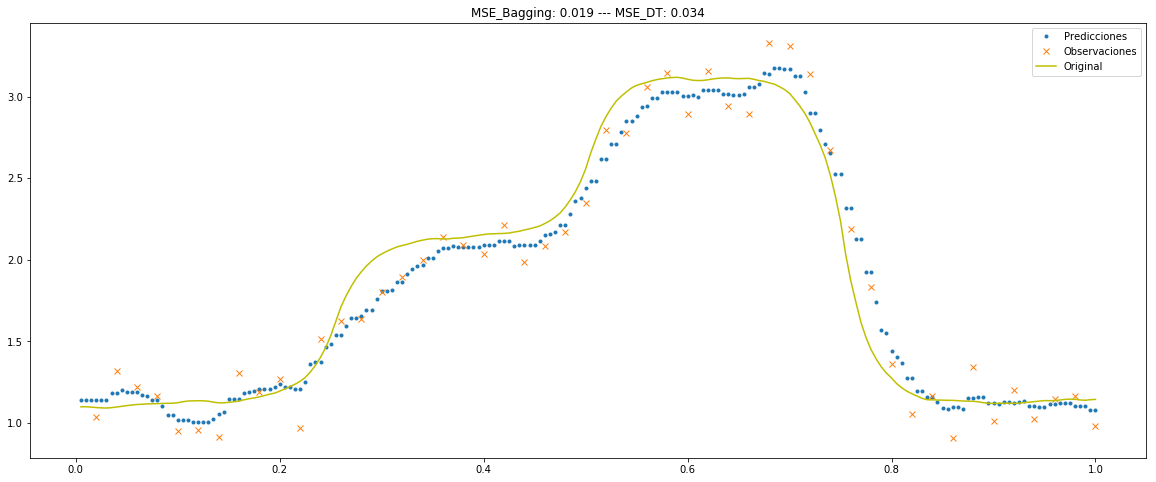

In [23]:
plt.figure(figsize=(20,8))
#plt.plot(X, y, label='Observaciones', c='r')
plt.plot(X_orig, y_pred_bagg, label='Predicciones', marker='.', linestyle = 'None')
plt.plot(X, y, label='Observaciones', marker='x', linestyle = 'None',)
plt.plot(X_orig, y_clean, label='Original', c='y')
plt.title(f'MSE_Bagging: {MSE_bagging:.3f} --- MSE_DT: {MSE_DT:.3f}' )
plt.legend()

# Estimadores en el bagging

In [24]:
bagg_reg.estimators_[:3]

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1028862084, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=870353631, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_w

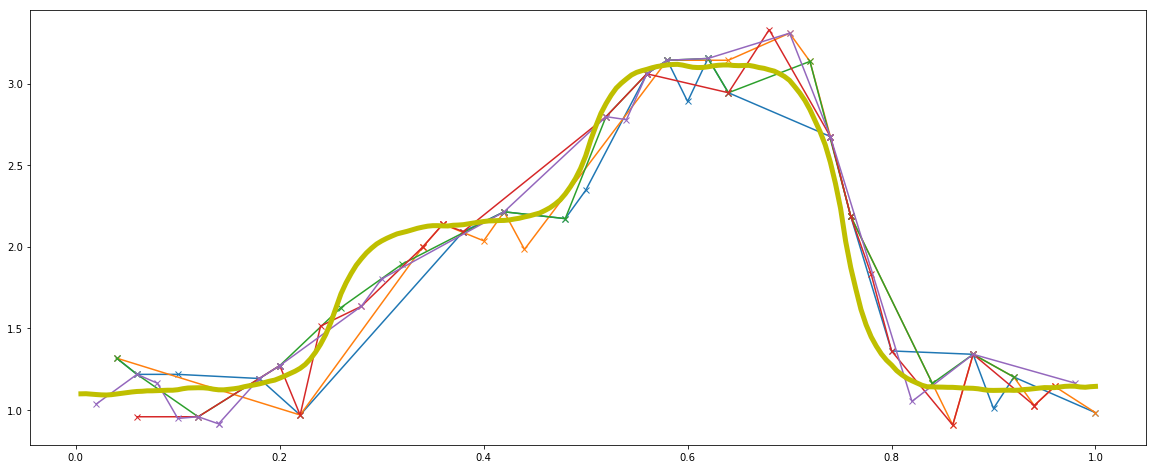

In [26]:
plt.figure(figsize=(20,8))
for i, DT_predictor in enumerate(bagg_reg.estimators_[:5]):
    X_bs = X[np.sort(bagg_reg.estimators_samples_[i])]
    y_pred_one_model = DT_predictor.predict(X_bs)
    
    plt.plot(X_bs, y_pred_one_model, label='Observaciones', marker='x',)
    # plt.plot(, y_pred_one_model, marker='.')
plt.plot(X_orig, y_clean, label='Original', c='y', lw=5)

# Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [154]:
n_estimators = 10
boost_reg = GradientBoostingRegressor(criterion='mse', n_estimators=n_estimators, subsample=1.0, max_depth=1, learning_rate=1.0)

In [155]:
boost_reg.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [156]:
y_boost = boost_reg.predict(X)

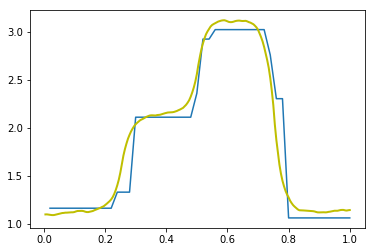

In [157]:
plt.plot(X, y_boost)
plt.plot(X_orig, y_clean, label='Original', c='y', lw=2)

In [158]:
# El score es R^2
boost_reg.score(X, y)

0.9510899905344777

## Tomo el primer stump

In [168]:
boost_reg.estimators_[0][0]

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=<mtrand.RandomState object at 0x7f6fc48e1168>,
                      splitter='best')

[Text(167.4, 163.07999999999998, 'X <= 0.29\nmse = 0.598\nsamples = 50\nvalue = -0.0'),
 Text(83.7, 54.360000000000014, 'mse = 0.056\nsamples = 14\nvalue = -0.627'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.596\nsamples = 36\nvalue = 0.244')]

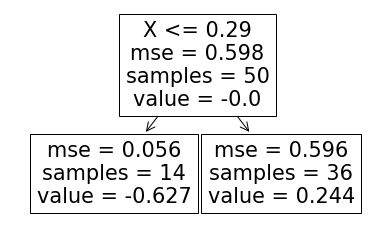

In [169]:
plot_tree(boost_reg.estimators_[0][0], feature_names=['X'])

In [165]:
# Verifico coincidencia con primer nodo
np.mean((y-np.mean(y))**2)

0.597965699825768

In [166]:
# Verifico coincidencia con primer hoja
n_split = 14
np.mean((y[:n_split]-np.mean(y[:n_split]))**2)

0.05582101303474455

In [167]:
# Verifico coincidencia con segunda hoja
np.mean((y[n_split:]-np.mean(y[n_split:]))**2)

0.5961786917039666

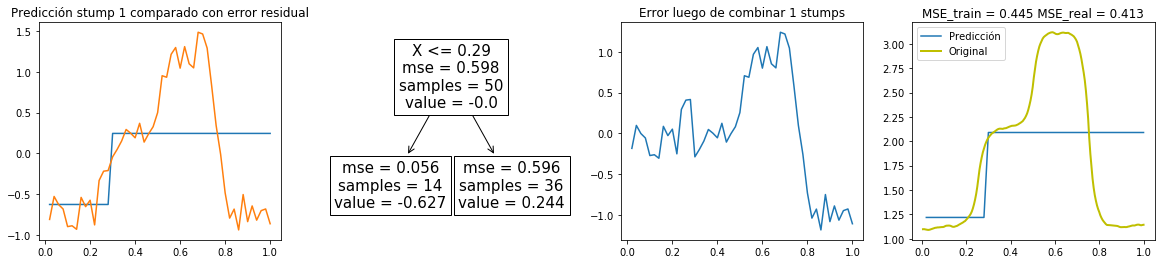

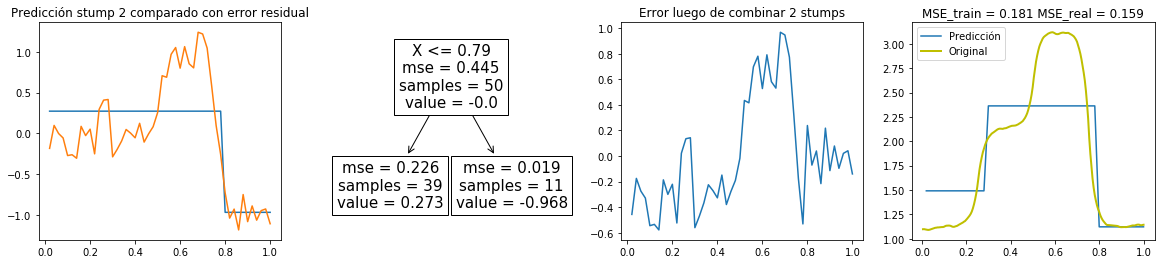

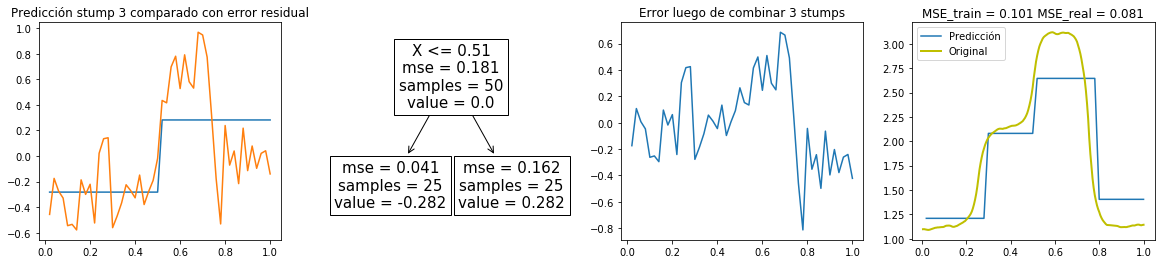

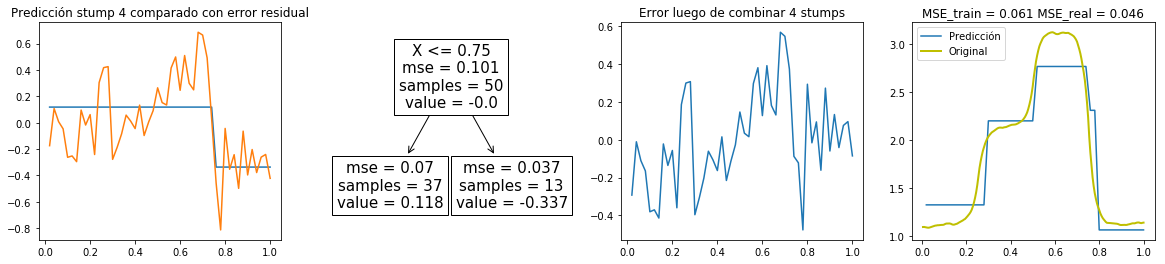

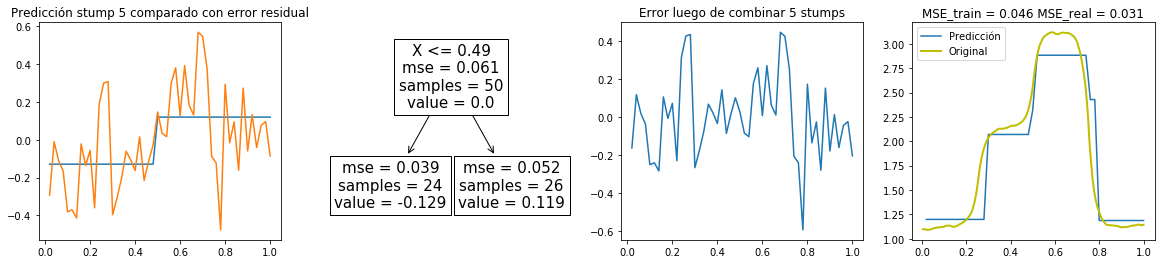

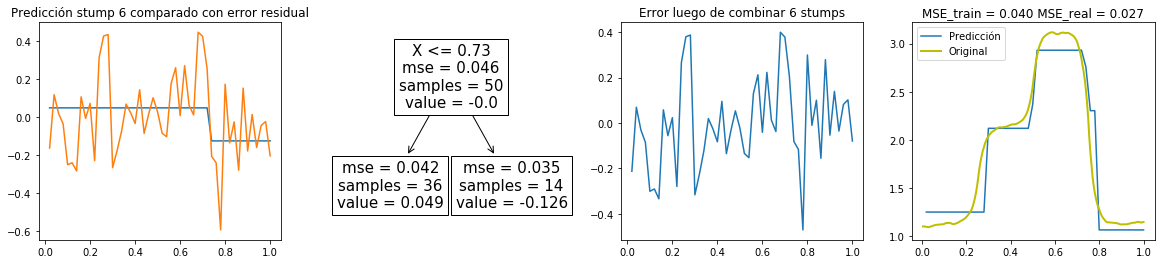

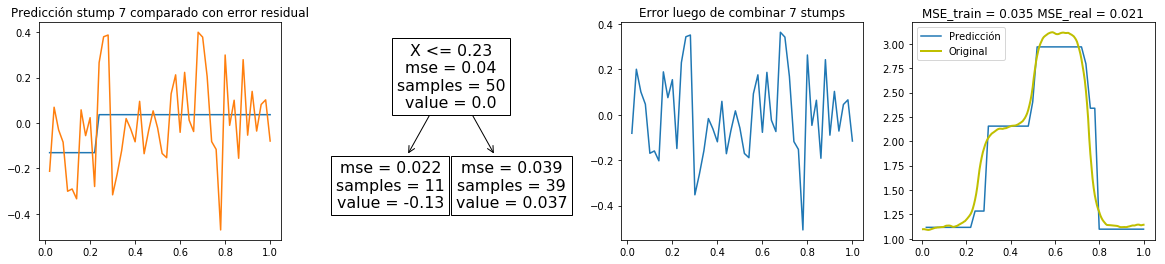

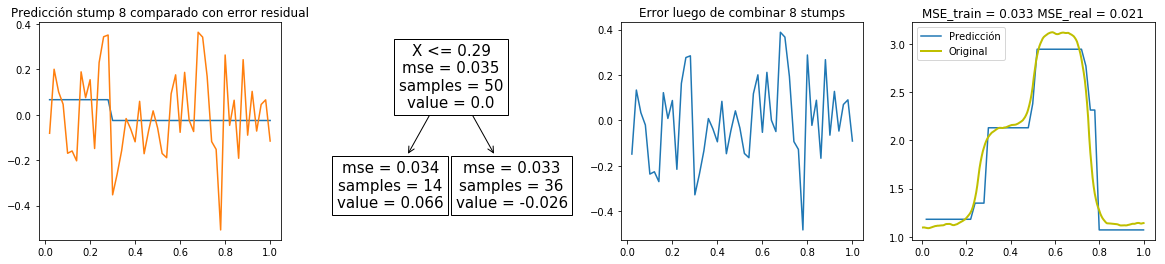

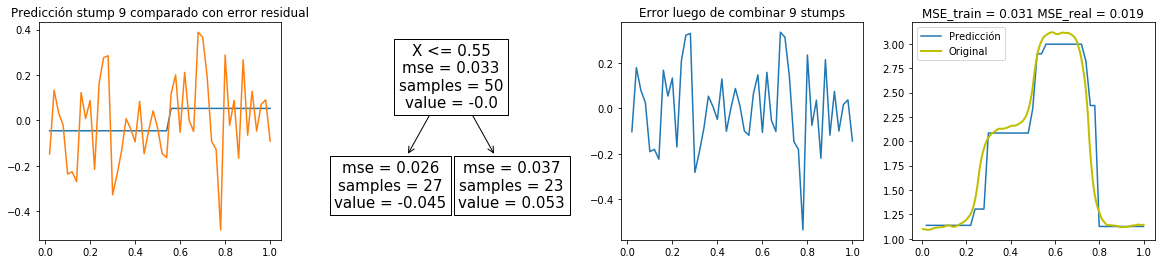

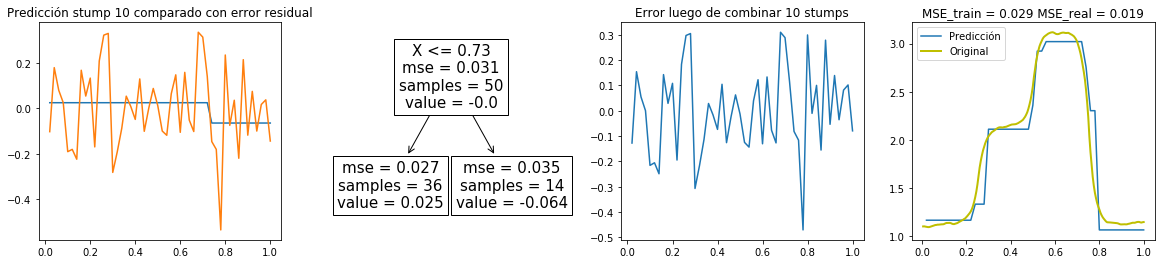

In [162]:
previous_pred = np.mean(y)
previous_error = y - previous_pred
MSE_train_array = []
MSE_real_array = []
plot_n = -1
for i, stage_pred in enumerate(boost_reg.staged_predict(X)):
    if i>plot_n:
        f, ax = plt.subplots(1, 4, figsize=(20, 4))
        ax[3].plot(X, stage_pred, label='Predicción')
        ax[3].plot(X_orig, y_clean, label='Original', c='y', lw=2)
        ax[3].legend()
        ax[0].plot(X, stage_pred - previous_pred)
        ax[0].plot(X, previous_error)
        ax[0].set_title(f'Predicción stump {i+1} comparado con error residual')
    error_func = y - stage_pred
    previous_error = error_func
    MSE_train = np.mean(error_func**2)
    MSE_real = np.mean((y_clean_downsampled - stage_pred)**2)
    MSE_train_array.append(MSE_train)
    MSE_real_array.append(MSE_real)
    if i>plot_n:
        ax[2].plot(X, error_func)
        ax[2].set_title(f'Error luego de combinar {i+1} stumps')
        ax[3].set_title(f'MSE_train = {MSE_train:.3f} MSE_real = {MSE_real:.3f}')
    previous_pred = stage_pred
    if i>plot_n:
        plot_tree(boost_reg.estimators_[i][0], ax=ax[1], feature_names=['X'])
        plt.show()

In [151]:
np.min(MSE_real_array)

0.01431540921143725

Text(0, 0.5, 'MSE')

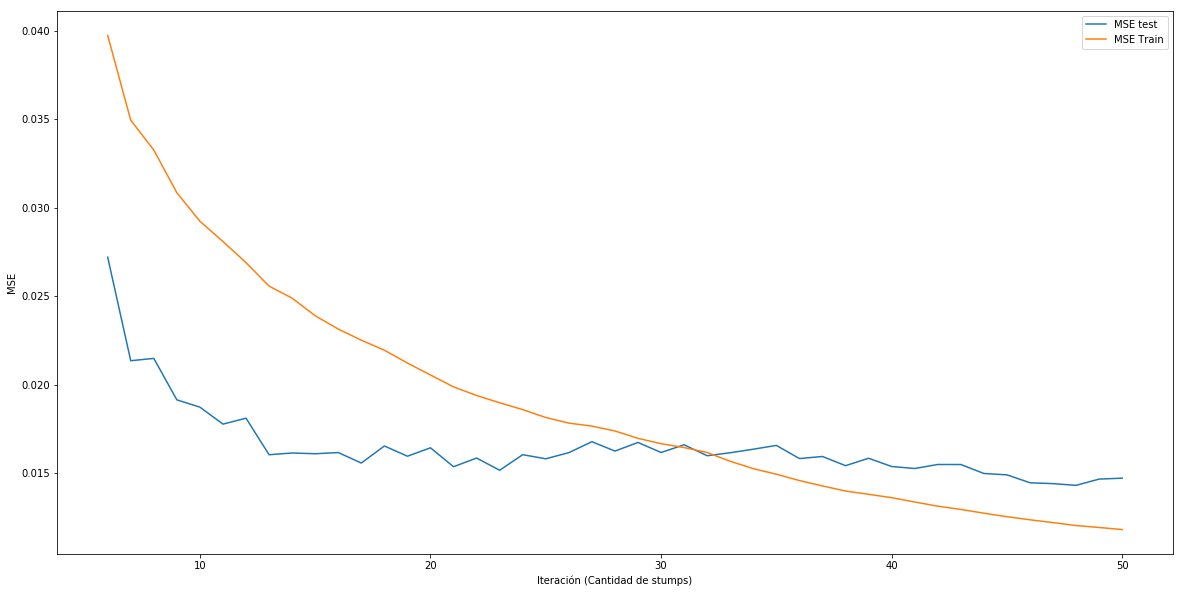

In [152]:
plt.figure(figsize=(20,10))
N = 5
stumps = np.linspace(1, len(MSE_real_array), len(MSE_real_array))
plt.plot(stumps[N:], MSE_real_array[N:], label='MSE test')
plt.plot(stumps[N:], MSE_train_array[N:], label='MSE Train')
plt.legend()
plt.xlabel('Iteración (Cantidad de stumps)')
plt.ylabel('MSE')

# Gradient Descent

$\huge MSE = \sum_i {(y_i - \hat{y_i}^{(1)})^2}$



$\huge e^{(1)} = y_i - \hat{y_i}^{(1)}$

$\huge \hat{y_i}^{(2)} = \hat{y_i}^{(1)} + \hat{e}^{(1)}$

$\huge y_i^{(2)} = \hat{y_i}^{(1)} + l_r \quad  \hat{e}^{(1)}$

notar que el error proporcional es la derivada del MSE

IndexError: index 16 is out of bounds for axis 0 with size 16

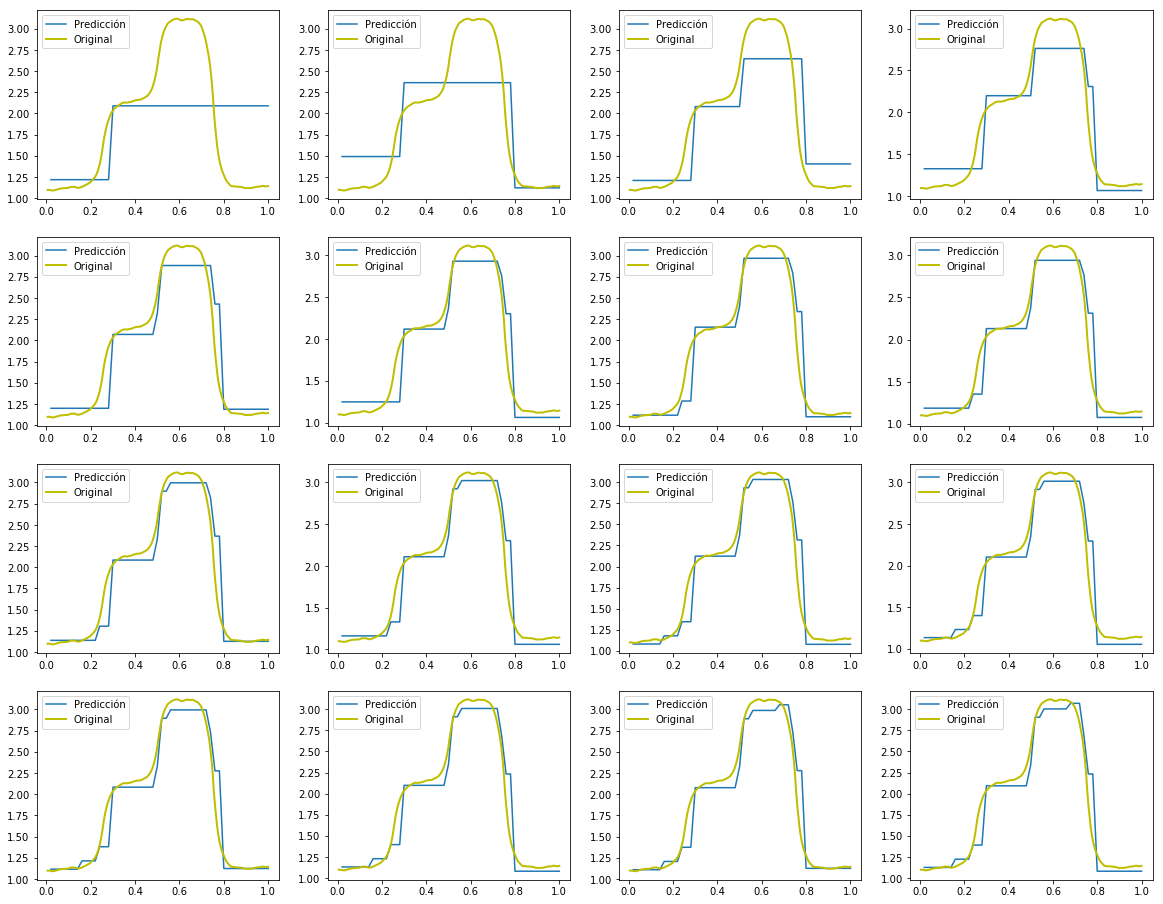

In [153]:
previous_pred = np.mean(y)
previous_error = y - previous_pred
MSE_train_array = []
MSE_real_array = []
f, ax = plt.subplots(4, 4, figsize=(20, 4*4))
ax = ax.reshape(-1)
for i, stage_pred in enumerate(boost_reg.staged_predict(X)):
    ax[i].plot(X, stage_pred, label='Predicción')
    ax[i].plot(X_orig, y_clean, label='Original', c='y', lw=2)
    ax[i].legend()

In [1038]:
stumps

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

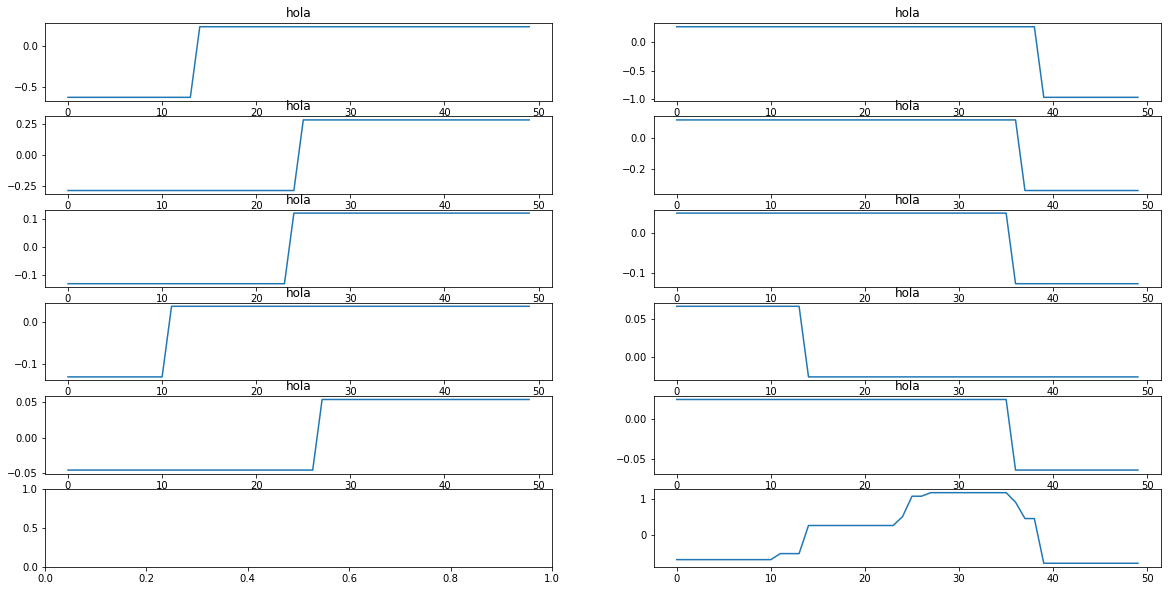

In [927]:
Sf, ax = plt.subplots(n_estimators//2 + 1, 2, figsize=(20,10))
ax = ax.reshape(-1)
suma = 0
for i, DT_predictor in enumerate(boost_reg.estimators_):
    prediction = DT_predictor[0].predict(X)
    ax[i].plot(prediction)
    suma = suma + prediction
    ax[i].set_title(f'hola')
ax[-1].plot(suma)

In [587]:
boost_reg.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=<mtrand.RandomState object at 0x7fc6989b8090>,
                      splitter='best')], dtype=object)